In [29]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr
import xesmf as xe
import cartopy
import dask
from tqdm.autonotebook import tqdm  # Fancy progress bars for our loops!
import intake
import fsspec
import requests
import aiohttp
import nc_time_axis
import cftime

In [30]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize'] = 12, 6

In [31]:
df = pd.read_csv('https://storage.googleapis.com/cmip6/cmip6-zarr-consolidated-stores.csv')
df.head()

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,ps,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
1,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,rsds,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
2,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,rlus,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
3,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,rlds,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706
4,HighResMIP,CMCC,CMCC-CM2-HR4,highresSST-present,r1i1p1f1,Amon,psl,gn,gs://cmip6/CMIP6/HighResMIP/CMCC/CMCC-CM2-HR4/...,NaN,20170706


## Activity, institution, and source are fixed.
## Currently, table_id is only Amon, since I am looking at atmosphere

In [32]:
# df_ta_ncar = df.query("activity_id=='CMIP' & table_id == 'Amon' &  source_id == 'CESM2' & variable_id == 'tas'  & institution_id == 'NCAR'")
df_ta_ncar = df.query("activity_id=='CMIP' & table_id == 'Amon' &  source_id == 'CESM2'  & variable_id == 'tas' & institution_id == 'NCAR'")

# df_ta_ncar.experiment_id.unique()
df_ta_ncar

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
53470,CMIP,NCAR,CESM2,amip,r1i1p1f1,Amon,tas,gn,gs://cmip6/CMIP6/CMIP/NCAR/CESM2/amip/r1i1p1f1...,NaN,20190218
55166,CMIP,NCAR,CESM2,amip,r3i1p1f1,Amon,tas,gn,gs://cmip6/CMIP6/CMIP/NCAR/CESM2/amip/r3i1p1f1...,NaN,20190220
55264,CMIP,NCAR,CESM2,amip,r2i1p1f1,Amon,tas,gn,gs://cmip6/CMIP6/CMIP/NCAR/CESM2/amip/r2i1p1f1...,NaN,20190220
59875,CMIP,NCAR,CESM2,historical,r1i1p1f1,Amon,tas,gn,gs://cmip6/CMIP6/CMIP/NCAR/CESM2/historical/r1...,NaN,20190308
61655,CMIP,NCAR,CESM2,historical,r4i1p1f1,Amon,tas,gn,gs://cmip6/CMIP6/CMIP/NCAR/CESM2/historical/r4...,NaN,20190308
61862,CMIP,NCAR,CESM2,historical,r5i1p1f1,Amon,tas,gn,gs://cmip6/CMIP6/CMIP/NCAR/CESM2/historical/r5...,NaN,20190308
62691,CMIP,NCAR,CESM2,historical,r2i1p1f1,Amon,tas,gn,gs://cmip6/CMIP6/CMIP/NCAR/CESM2/historical/r2...,NaN,20190308
63131,CMIP,NCAR,CESM2,historical,r3i1p1f1,Amon,tas,gn,gs://cmip6/CMIP6/CMIP/NCAR/CESM2/historical/r3...,NaN,20190308
63266,CMIP,NCAR,CESM2,historical,r6i1p1f1,Amon,tas,gn,gs://cmip6/CMIP6/CMIP/NCAR/CESM2/historical/r6...,NaN,20190308
64615,CMIP,NCAR,CESM2,historical,r8i1p1f1,Amon,tas,gn,gs://cmip6/CMIP6/CMIP/NCAR/CESM2/historical/r8...,NaN,20190311


In [33]:
df_4xco2 = df_ta_ncar.query(" experiment_id == 'abrupt-4xCO2' ")
df_4xco2

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
296475,CMIP,NCAR,CESM2,abrupt-4xCO2,r1i1p1f1,Amon,tas,gn,gs://cmip6/CMIP6/CMIP/NCAR/CESM2/abrupt-4xCO2/...,NaN,20190927


In [34]:
# get the path to a specific zarr store (the first one from the dataframe above)
zstore = df_4xco2.zstore.values[-1]
print(zstore)

# create a mutable-mapping-style interface to the store
mapper = fsspec.get_mapper(zstore)

# open it using xarray and zarr
ds = xr.open_zarr(mapper, consolidated=True)
ds

gs://cmip6/CMIP6/CMIP/NCAR/CESM2/abrupt-4xCO2/r1i1p1f1/Amon/tas/gn/v20190927/


<xarray.Dataset>
Dimensions:    (lat: 192, nbnd: 2, lon: 288, time: 11988)
Coordinates:
  * lat        (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
    lat_bnds   (lat, nbnd) float64 dask.array<chunksize=(192, 2), meta=np.ndarray>
  * lon        (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
    lon_bnds   (lon, nbnd) float64 dask.array<chunksize=(288, 2), meta=np.ndarray>
  * time       (time) object 0001-01-15 12:00:00 ... 0999-12-15 12:00:00
    time_bnds  (time, nbnd) object dask.array<chunksize=(11988, 2), meta=np.ndarray>
Dimensions without coordinates: nbnd
Data variables:
    tas        (time, lat, lon) float32 dask.array<chunksize=(823, 192, 288), meta=np.ndarray>
Attributes: (12/48)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          hybrid
    branch_time_in_child:   -182500.0
    branch_time_in_parent:  182865.0
    case_id:                46
    ...                     ...
    tracking_id:            hdl:21.14100/81280768-5338-4e76-a8cc-478d15b08664...
    variable_id:            tas
    variant_info:           CMIP6 CESM2 abrupt4xCO2 experiment with CAM6, int...
    variant_label:          r1i1p1f1
    netcdf_tracking_ids:    hdl:21.14100/81280768-5338-4e76-a8cc-478d15b08664...
    version_id:             v20190927

In [35]:
ds.indexes.values

<bound method Mapping.values of Indexes:
    lat      Float64Index([             -90.0, -89.05759162303664,  -88.1151832460733,
              -87.17277486910994,  -86.2303664921466, -85.28795811518324,
               -84.3455497382199, -83.40314136125654, -82.46073298429319,
              -81.51832460732984,
              ...
               81.51832460732984,   82.4607329842932,  83.40314136125653,
               84.34554973821989,  85.28795811518324,   86.2303664921466,
               87.17277486910996,  88.11518324607329,  89.05759162303664,
                            90.0],
             dtype='float64', name='lat', length=192)
    lon      Float64Index([   0.0,   1.25,    2.5,   3.75,    5.0,   6.25,    7.5,   8.75,
                10.0,  11.25,
              ...
               347.5, 348.75,  350.0, 351.25,  352.5, 353.75,  355.0, 356.25,
               357.5, 358.75],
             dtype='float64', name='lon', length=288)
    time     CFTimeIndex([0001-01-15 12:00:00, 0001-02-14 0

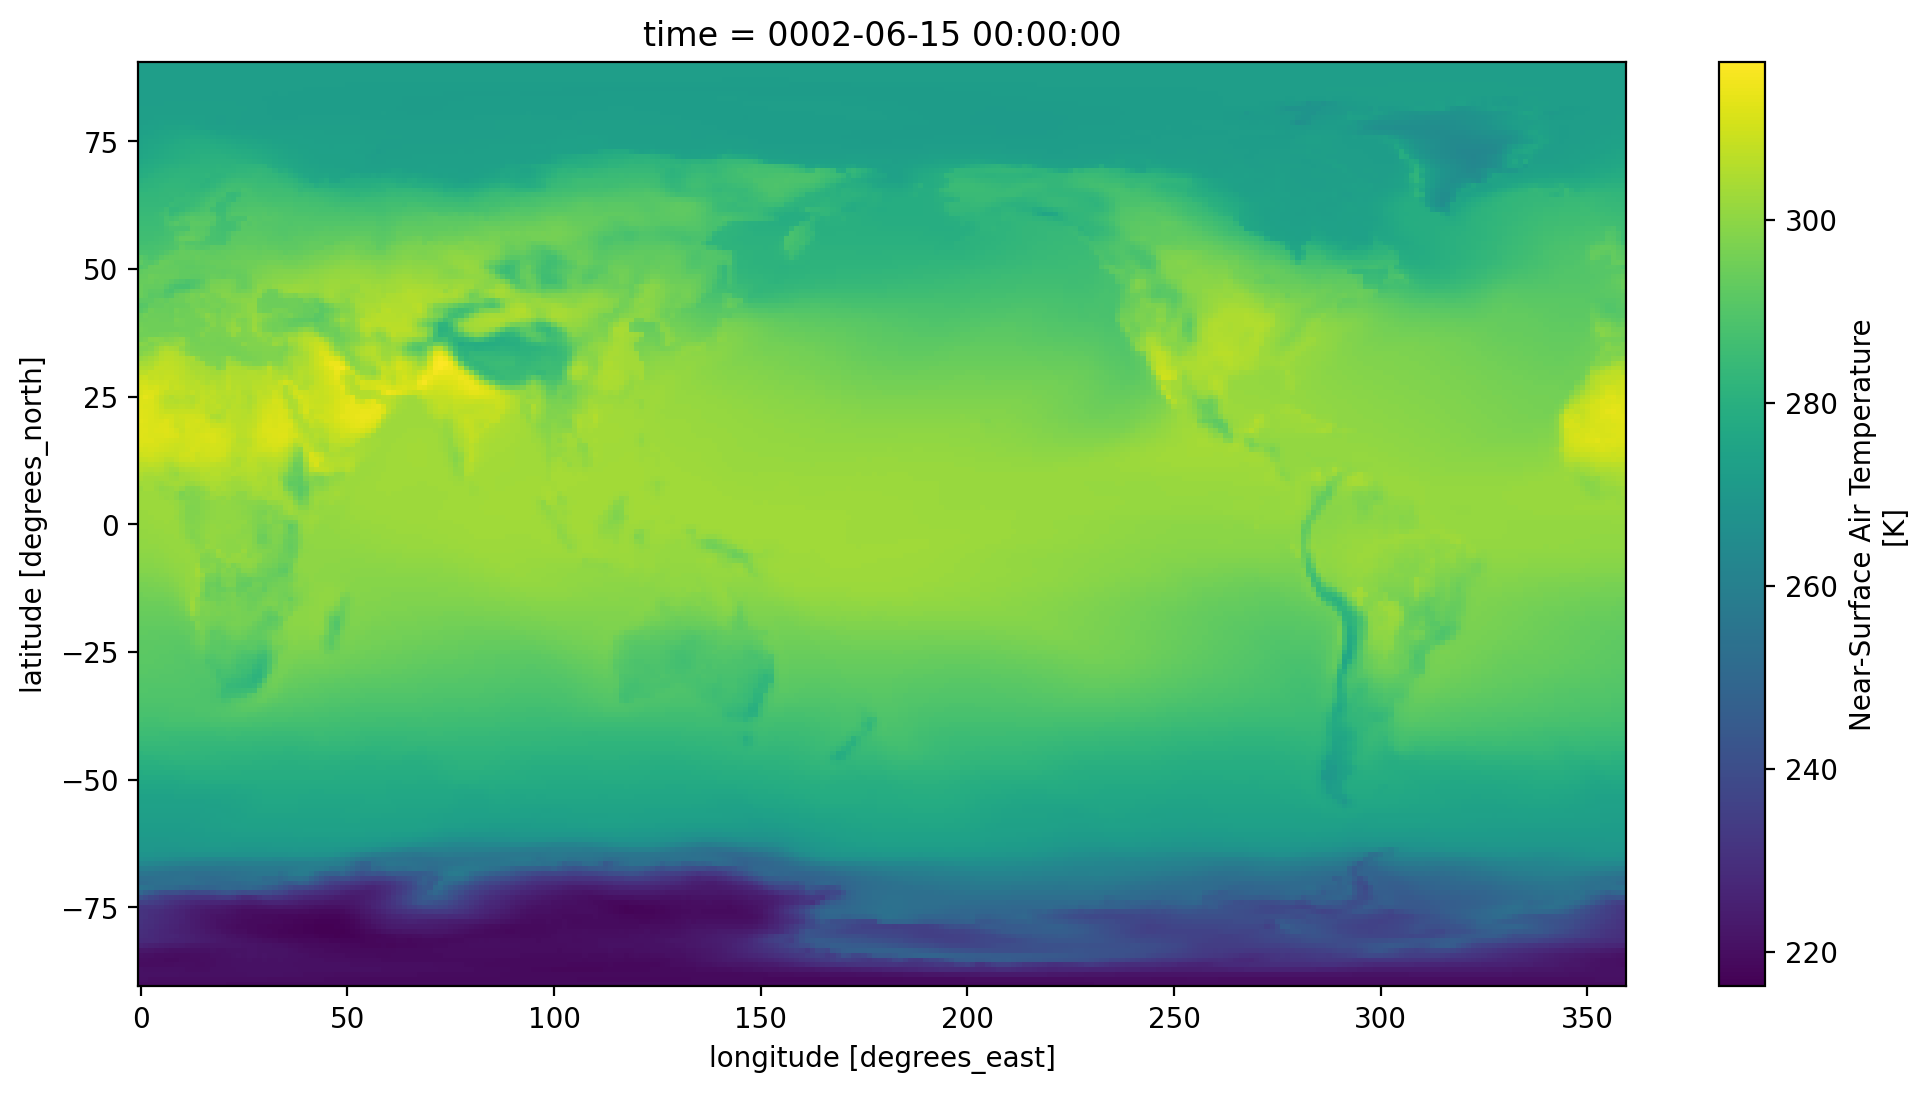

In [36]:
ds.tas.sel(time='0002-06').squeeze().plot()

In [37]:
df_area = df.query("variable_id == 'areacella' & source_id == 'CESM2' & experiment_id =='abrupt-4xCO2'")
df_area

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
296626,CMIP,NCAR,CESM2,abrupt-4xCO2,r1i1p1f1,fx,areacella,gn,gs://cmip6/CMIP6/CMIP/NCAR/CESM2/abrupt-4xCO2/...,NaN,20190927


In [38]:

ds_area = xr.open_zarr(fsspec.get_mapper(df_area.zstore.values[-1]), consolidated=True)
ds_area

<xarray.Dataset>
Dimensions:    (lat: 192, lon: 288, nbnd: 2)
Coordinates:
  * lat        (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
    lat_bnds   (lat, nbnd) float64 dask.array<chunksize=(192, 2), meta=np.ndarray>
  * lon        (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
    lon_bnds   (lon, nbnd) float64 dask.array<chunksize=(288, 2), meta=np.ndarray>
Dimensions without coordinates: nbnd
Data variables:
    areacella  (lat, lon) float32 dask.array<chunksize=(192, 288), meta=np.ndarray>
Attributes: (12/47)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          hybrid
    branch_time_in_child:   -182500.0
    branch_time_in_parent:  182865.0
    case_id:                46
    ...                     ...
    tracking_id:            hdl:21.14100/693ff6fe-9a5b-4798-99ba-411c10e236e3
    variable_id:            areacella
    variant_info:           CMIP6 CESM2 abrupt4xCO2 experiment with CAM6, int...
    variant_label:          r1i1p1f1
    netcdf_tracking_ids:    hdl:21.14100/693ff6fe-9a5b-4798-99ba-411c10e236e3
    version_id:             v20190927

In [39]:
total_area = ds_area.areacella.sum(dim=['lon', 'lat'])
ta_timeseries = (ds.tas * ds_area.areacella).sum(dim=['lon', 'lat']) / total_area
ta_timeseries

<xarray.DataArray (time: 11988)>
dask.array<truediv, shape=(11988,), dtype=float32, chunksize=(823,), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 0001-01-15 12:00:00 ... 0999-12-15 12:00:00

In [40]:
%time ta_timeseries.load()

CPU times: user 9.29 s, sys: 6.48 s, total: 15.8 s
Wall time: 36.7 s


<xarray.DataArray (time: 11988)>
array([285.5843 , 285.97662, 286.62933, ..., 298.27094, 297.53577,
       297.0627 ], dtype=float32)
Coordinates:
  * time     (time) object 0001-01-15 12:00:00 ... 0999-12-15 12:00:00

Text(0.5, 1.0, 'Global Mean Surface Air Temperature (4 times CO2)')

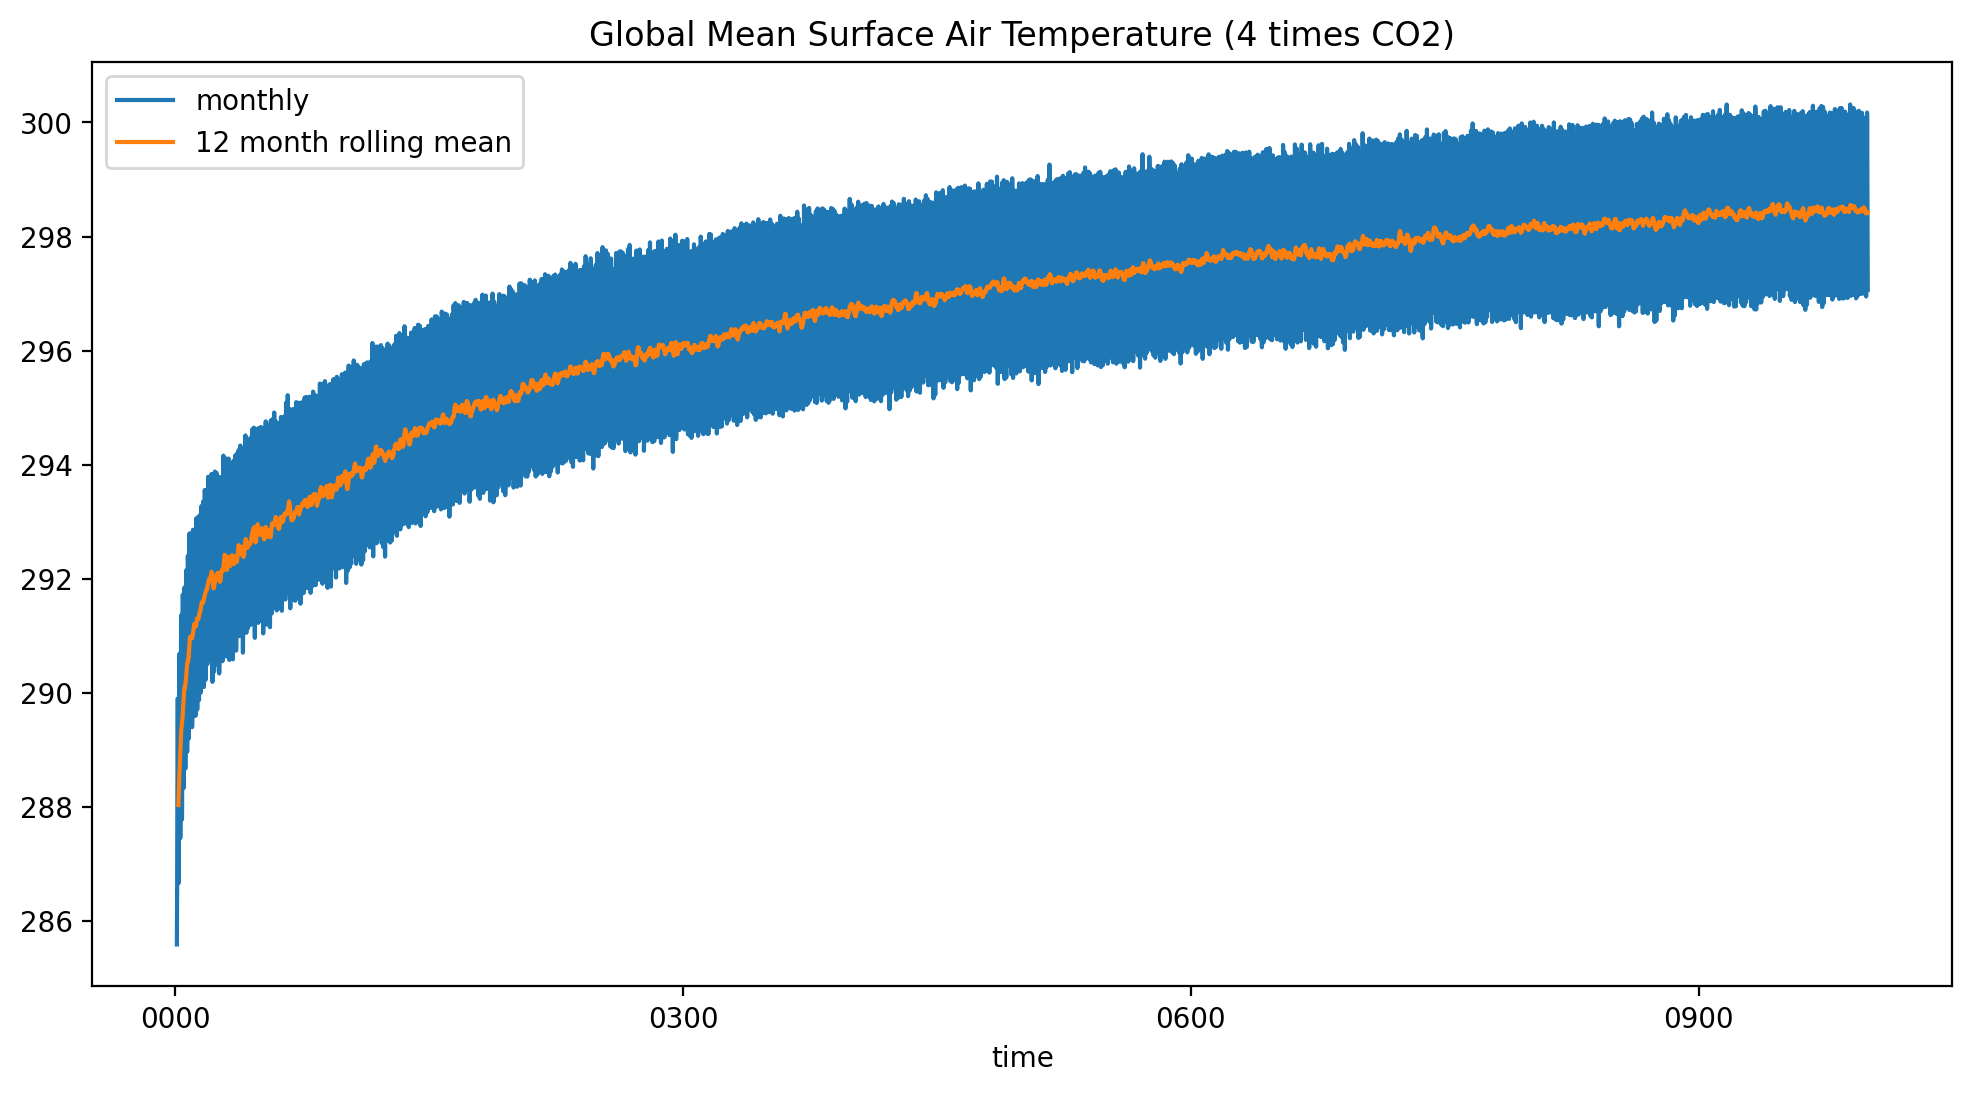

In [41]:
ta_timeseries.plot(label='monthly')
ta_timeseries.rolling(time=12).mean().plot(label='12 month rolling mean')
plt.legend()
plt.title('Global Mean Surface Air Temperature (4 times CO2)')

### I don't think it is comparable to the "historical" data, because this one has a very rong time period

Text(0.5, 1.0, 'Global Mean Surface Air Temperature (4 times CO2)')

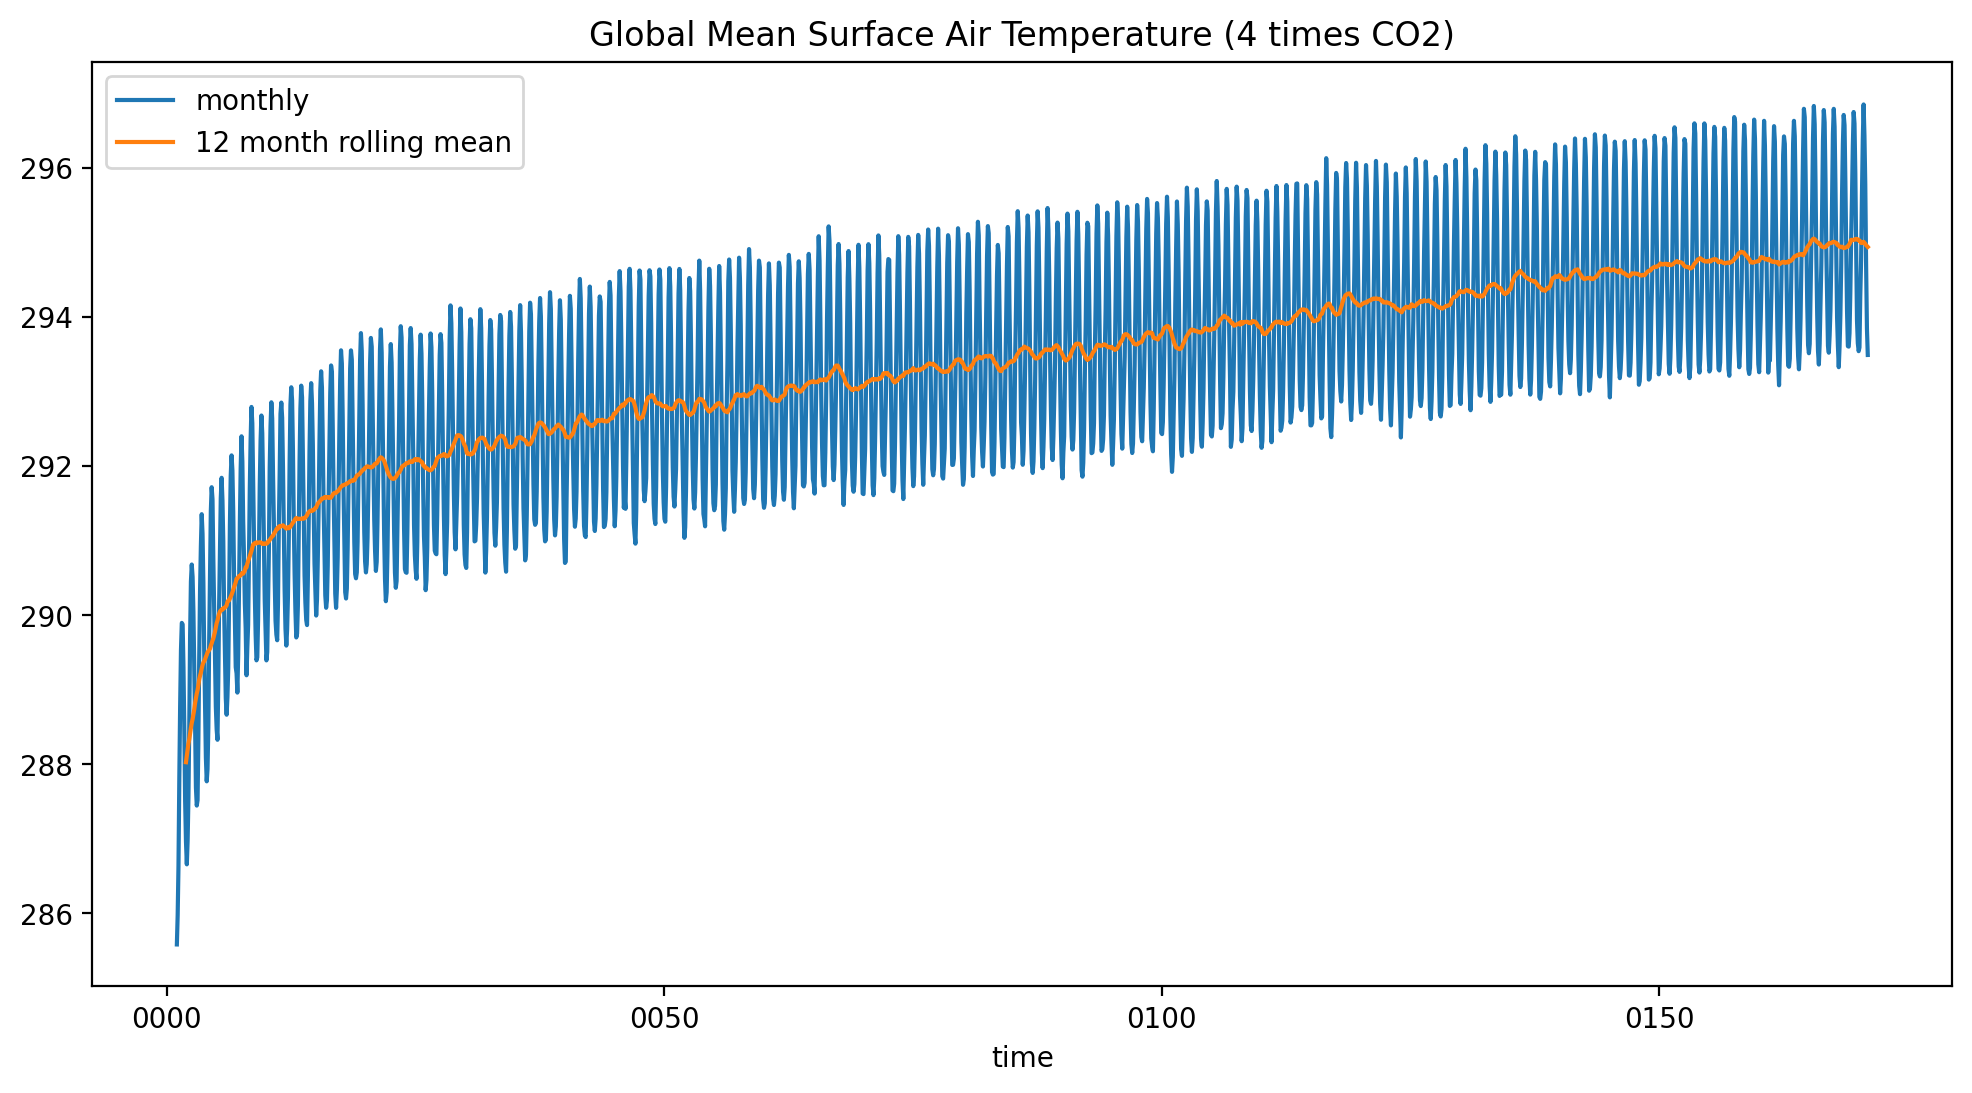

In [42]:
want_years = 170
want_months = want_years * 12
want_ta_timeseries = ta_timeseries[:want_months]
want_ta_timeseries.plot(label='monthly')
want_ta_timeseries.rolling(time=12).mean().plot(label='12 month rolling mean')
plt.legend()
plt.title('Global Mean Surface Air Temperature (4 times CO2)')

In [43]:
# df_ta_ncar = df.query("activity_id=='CMIP' & table_id == 'Amon' &  source_id == 'CESM2' & variable_id == 'tas'  & institution_id == 'NCAR'")
df_ta_ncar_his = df.query("activity_id=='CMIP' & table_id == 'Amon' &  source_id == 'CESM2'  & variable_id == 'tas' & institution_id == 'NCAR' & experiment_id == 'historical'")

# get the path to a specific zarr store (the first one from the dataframe above)
zstore_his = df_ta_ncar_his.zstore.values[-1]
print(zstore_his)

# create a mutable-mapping-style interface to the store
mapper_his = fsspec.get_mapper(zstore_his)

# open it using xarray and zarr
ds_his = xr.open_zarr(mapper_his, consolidated=True)
ds_his

gs://cmip6/CMIP6/CMIP/NCAR/CESM2/historical/r11i1p1f1/Amon/tas/gn/v20190514/


<xarray.Dataset>
Dimensions:    (lat: 192, nbnd: 2, lon: 288, time: 1980)
Coordinates:
  * lat        (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
    lat_bnds   (lat, nbnd) float64 dask.array<chunksize=(192, 2), meta=np.ndarray>
  * lon        (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
    lon_bnds   (lon, nbnd) float64 dask.array<chunksize=(288, 2), meta=np.ndarray>
  * time       (time) object 1850-01-15 12:00:00 ... 2014-12-15 12:00:00
    time_bnds  (time, nbnd) object dask.array<chunksize=(1980, 2), meta=np.ndarray>
Dimensions without coordinates: nbnd
Data variables:
    tas        (time, lat, lon) float32 dask.array<chunksize=(600, 192, 288), meta=np.ndarray>
Attributes: (12/49)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   674885.0
    branch_time_in_parent:  219000.0
    case_id:                972
    ...                     ...
    variable_id:            tas
    variant_info:           CMIP6 20th century experiments (1850-2014) with C...
    variant_label:          r11i1p1f1
    status:                 2019-10-25;created;by nhn2@columbia.edu
    netcdf_tracking_ids:    hdl:21.14100/a7278f6d-6a1b-4050-8f06-a8033604736a...
    version_id:             v20190514

In [44]:
# date_threshold = cftime.DatetimeNoLeap(1950, 1, 1)
# ds_his = ds_his.where(ds_his.time > date_threshold, drop=True)
# ds_his
ds_his['time'] = [cftime.DatetimeGregorian(date.year - 1849, date.month, date.day) for date in ds_his['time'].values]
ds_his

<xarray.Dataset>
Dimensions:    (lat: 192, nbnd: 2, lon: 288, time: 1980)
Coordinates:
  * lat        (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 88.12 89.06 90.0
    lat_bnds   (lat, nbnd) float64 dask.array<chunksize=(192, 2), meta=np.ndarray>
  * lon        (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
    lon_bnds   (lon, nbnd) float64 dask.array<chunksize=(288, 2), meta=np.ndarray>
  * time       (time) object 0001-01-15 00:00:00 ... 0165-12-15 00:00:00
    time_bnds  (time, nbnd) object dask.array<chunksize=(1980, 2), meta=np.ndarray>
Dimensions without coordinates: nbnd
Data variables:
    tas        (time, lat, lon) float32 dask.array<chunksize=(600, 192, 288), meta=np.ndarray>
Attributes: (12/49)
    Conventions:            CF-1.7 CMIP-6.2
    activity_id:            CMIP
    branch_method:          standard
    branch_time_in_child:   674885.0
    branch_time_in_parent:  219000.0
    case_id:                972
    ...                     ...
    variable_id:            tas
    variant_info:           CMIP6 20th century experiments (1850-2014) with C...
    variant_label:          r11i1p1f1
    status:                 2019-10-25;created;by nhn2@columbia.edu
    netcdf_tracking_ids:    hdl:21.14100/a7278f6d-6a1b-4050-8f06-a8033604736a...
    version_id:             v20190514

Text(0.5, 1.0, 'Global Mean Surface Air Temperature')

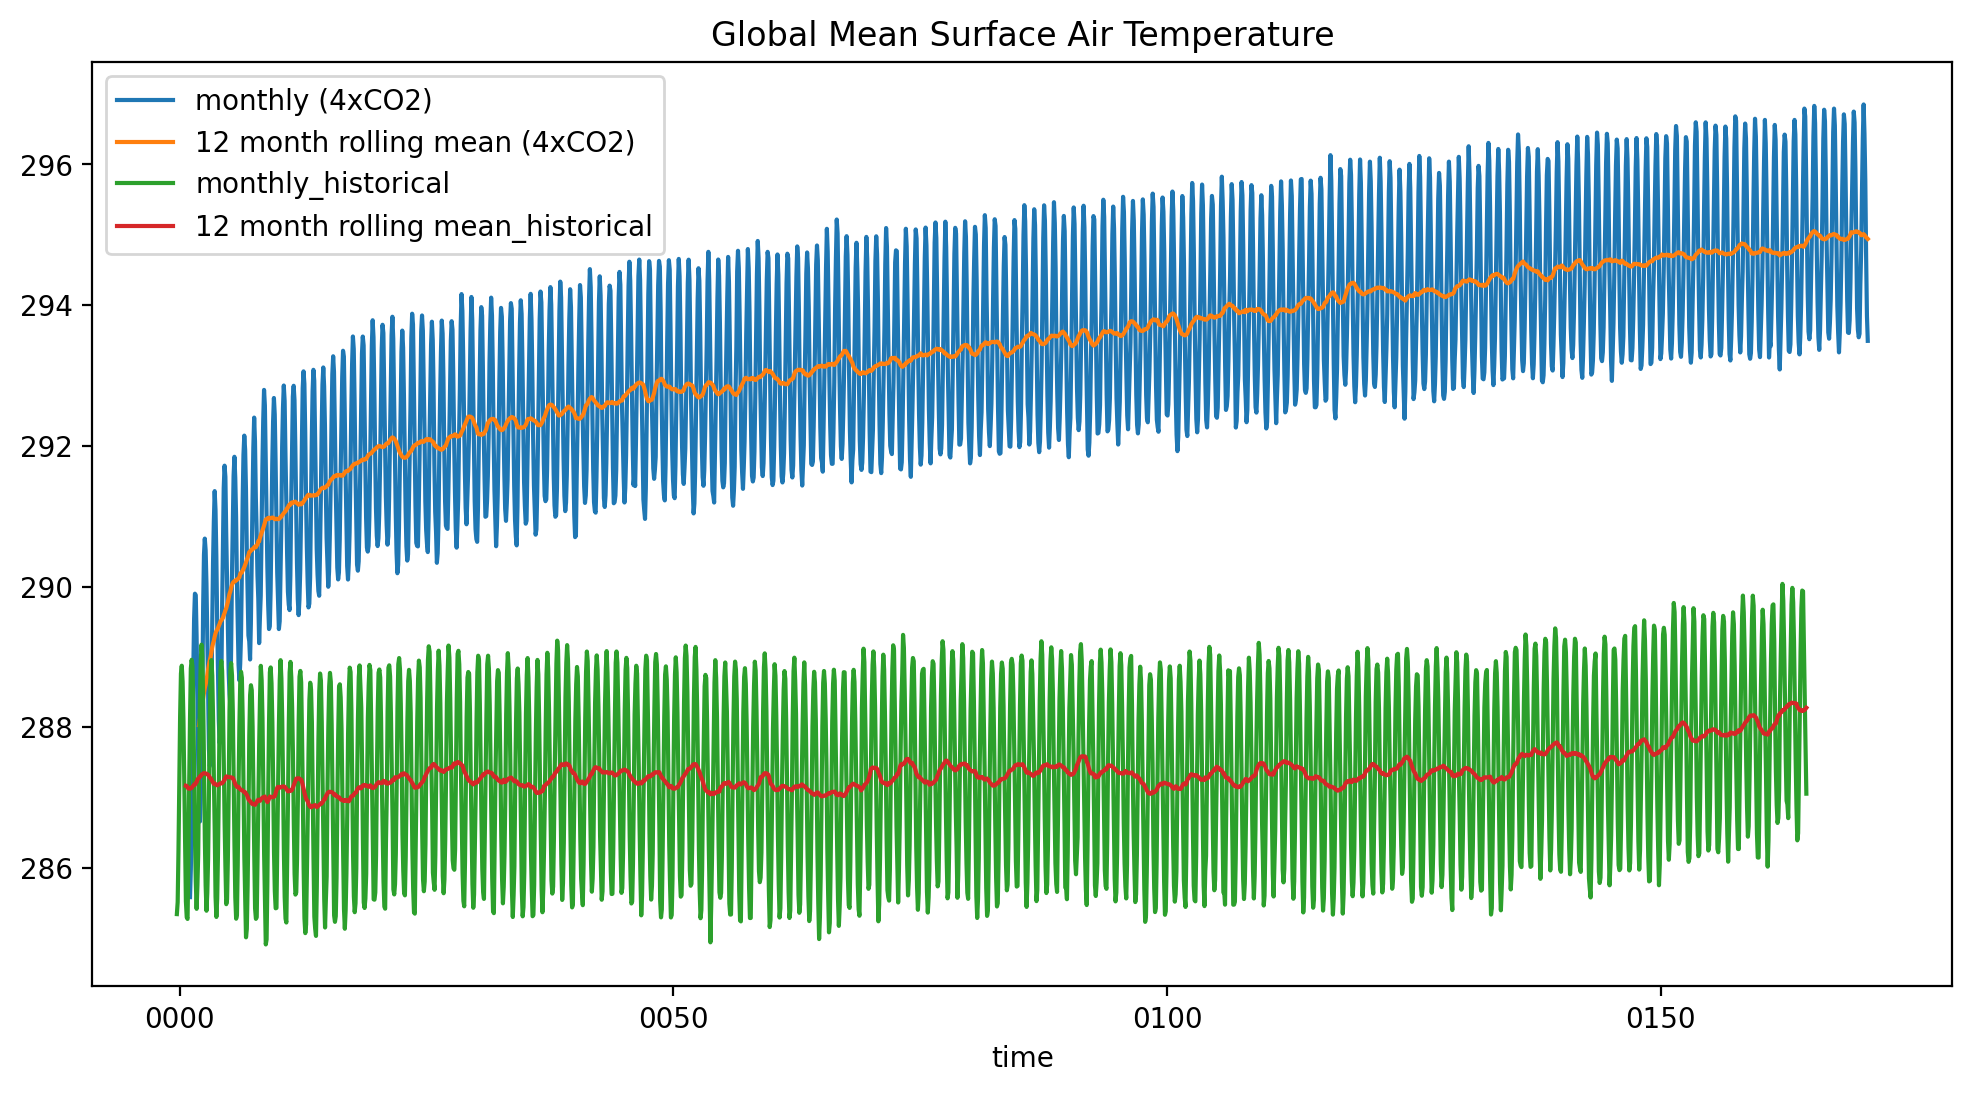

In [45]:
ta_timeseries_his = (ds_his.tas * ds_area.areacella).sum(dim=['lon', 'lat']) / total_area
want_ta_timeseries.plot(label='monthly (4xCO2)')
want_ta_timeseries.rolling(time=12).mean().plot(label='12 month rolling mean (4xCO2)')
ta_timeseries_his.plot(label='monthly_historical')
ta_timeseries_his.rolling(time=12).mean().plot(label='12 month rolling mean_historical')
plt.legend()
plt.title('Global Mean Surface Air Temperature')

In [46]:
want_ta_timeseries - 287

<xarray.DataArray (time: 2040)>
array([-1.4157104, -1.0233765, -0.3706665, ...,  7.6967773,  6.8453674,
        6.492462 ], dtype=float32)
Coordinates:
  * time     (time) object 0001-01-15 12:00:00 ... 0170-12-15 12:00:00

Text(0.5, 1.0, 'Global Mean Surface Air Temperature (4 times CO2)')

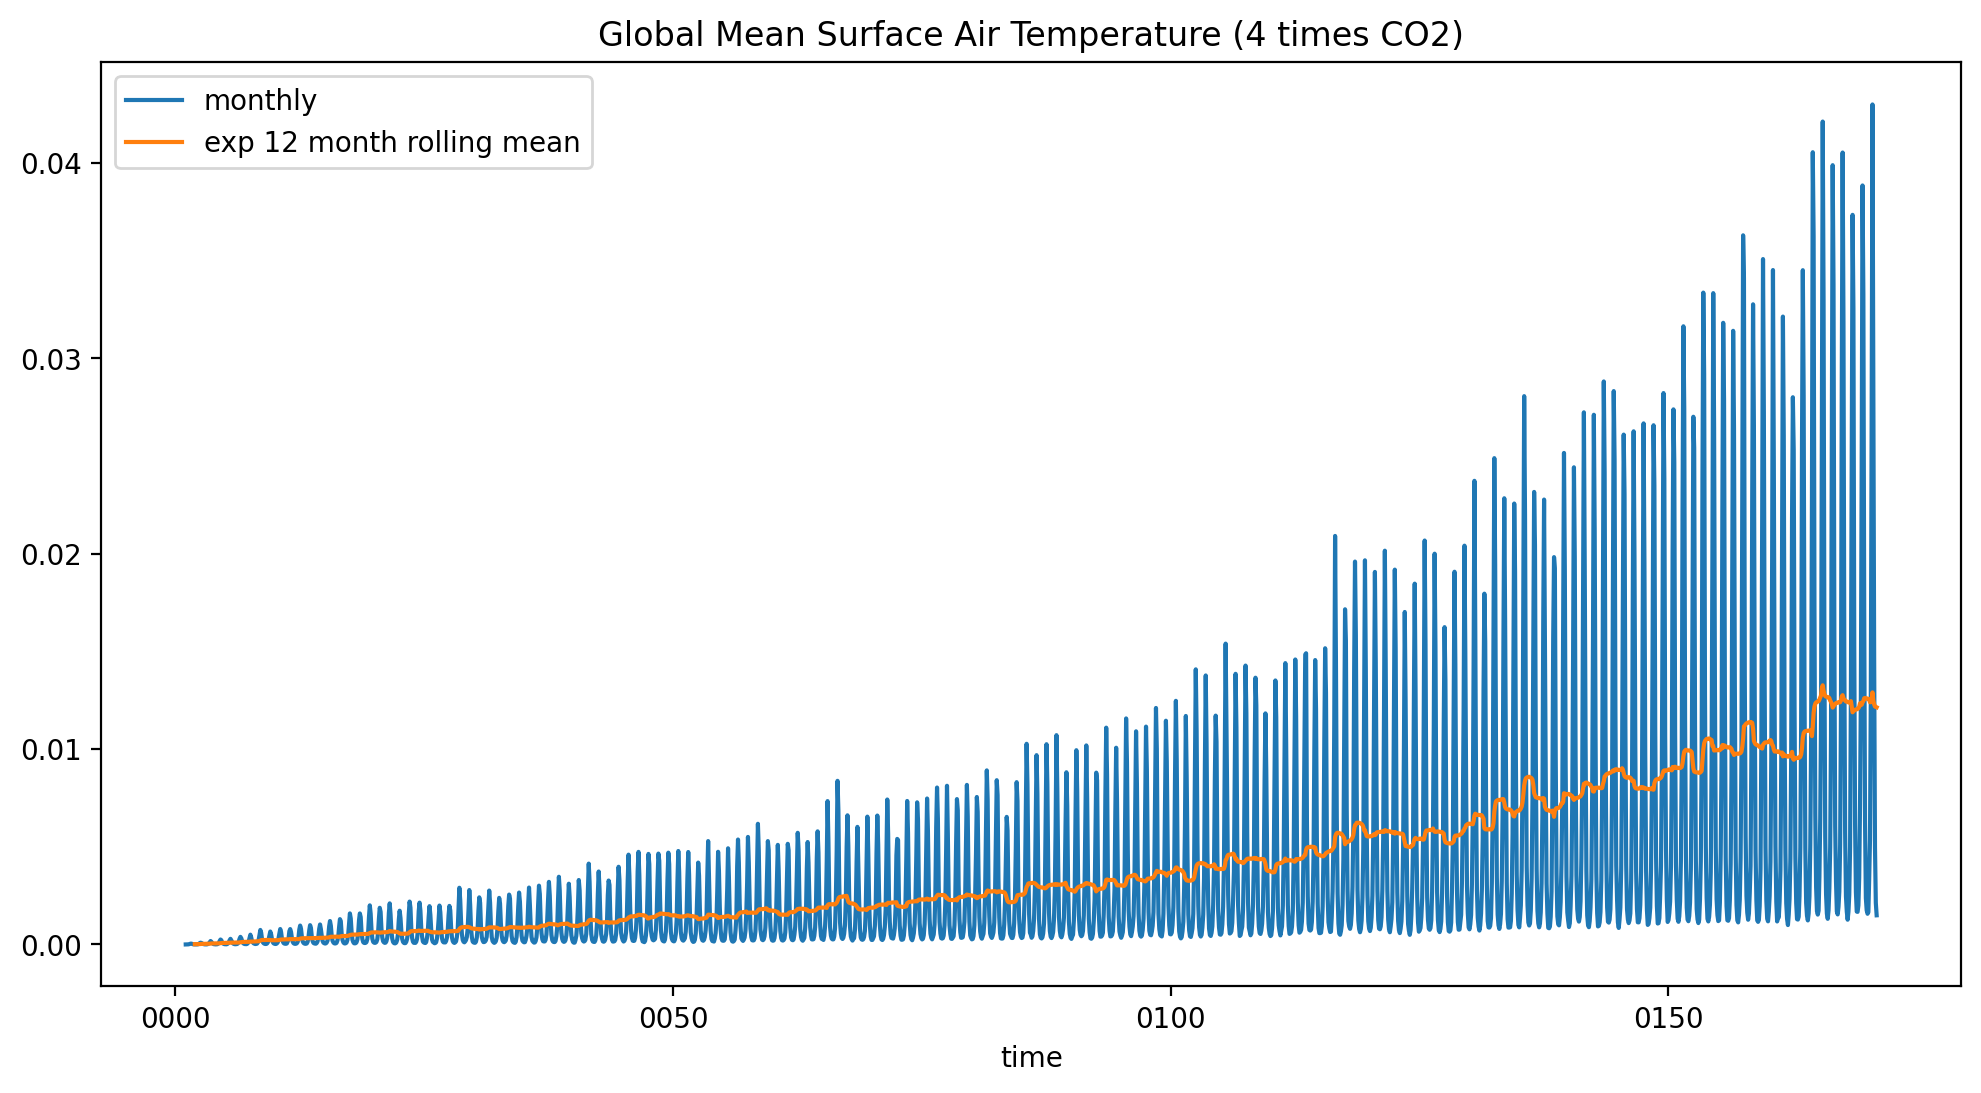

In [47]:
exp_want_ta_timeseries = np.exp(want_ta_timeseries-300)
exp_want_ta_timeseries.plot(label='monthly')
exp_want_ta_timeseries.rolling(time=12).mean().plot(label='exp 12 month rolling mean')
plt.legend()
plt.title('Global Mean Surface Air Temperature (4 times CO2)')

Text(0.5, 1.0, 'Global Mean Surface Air Temperature (4 times CO2)')

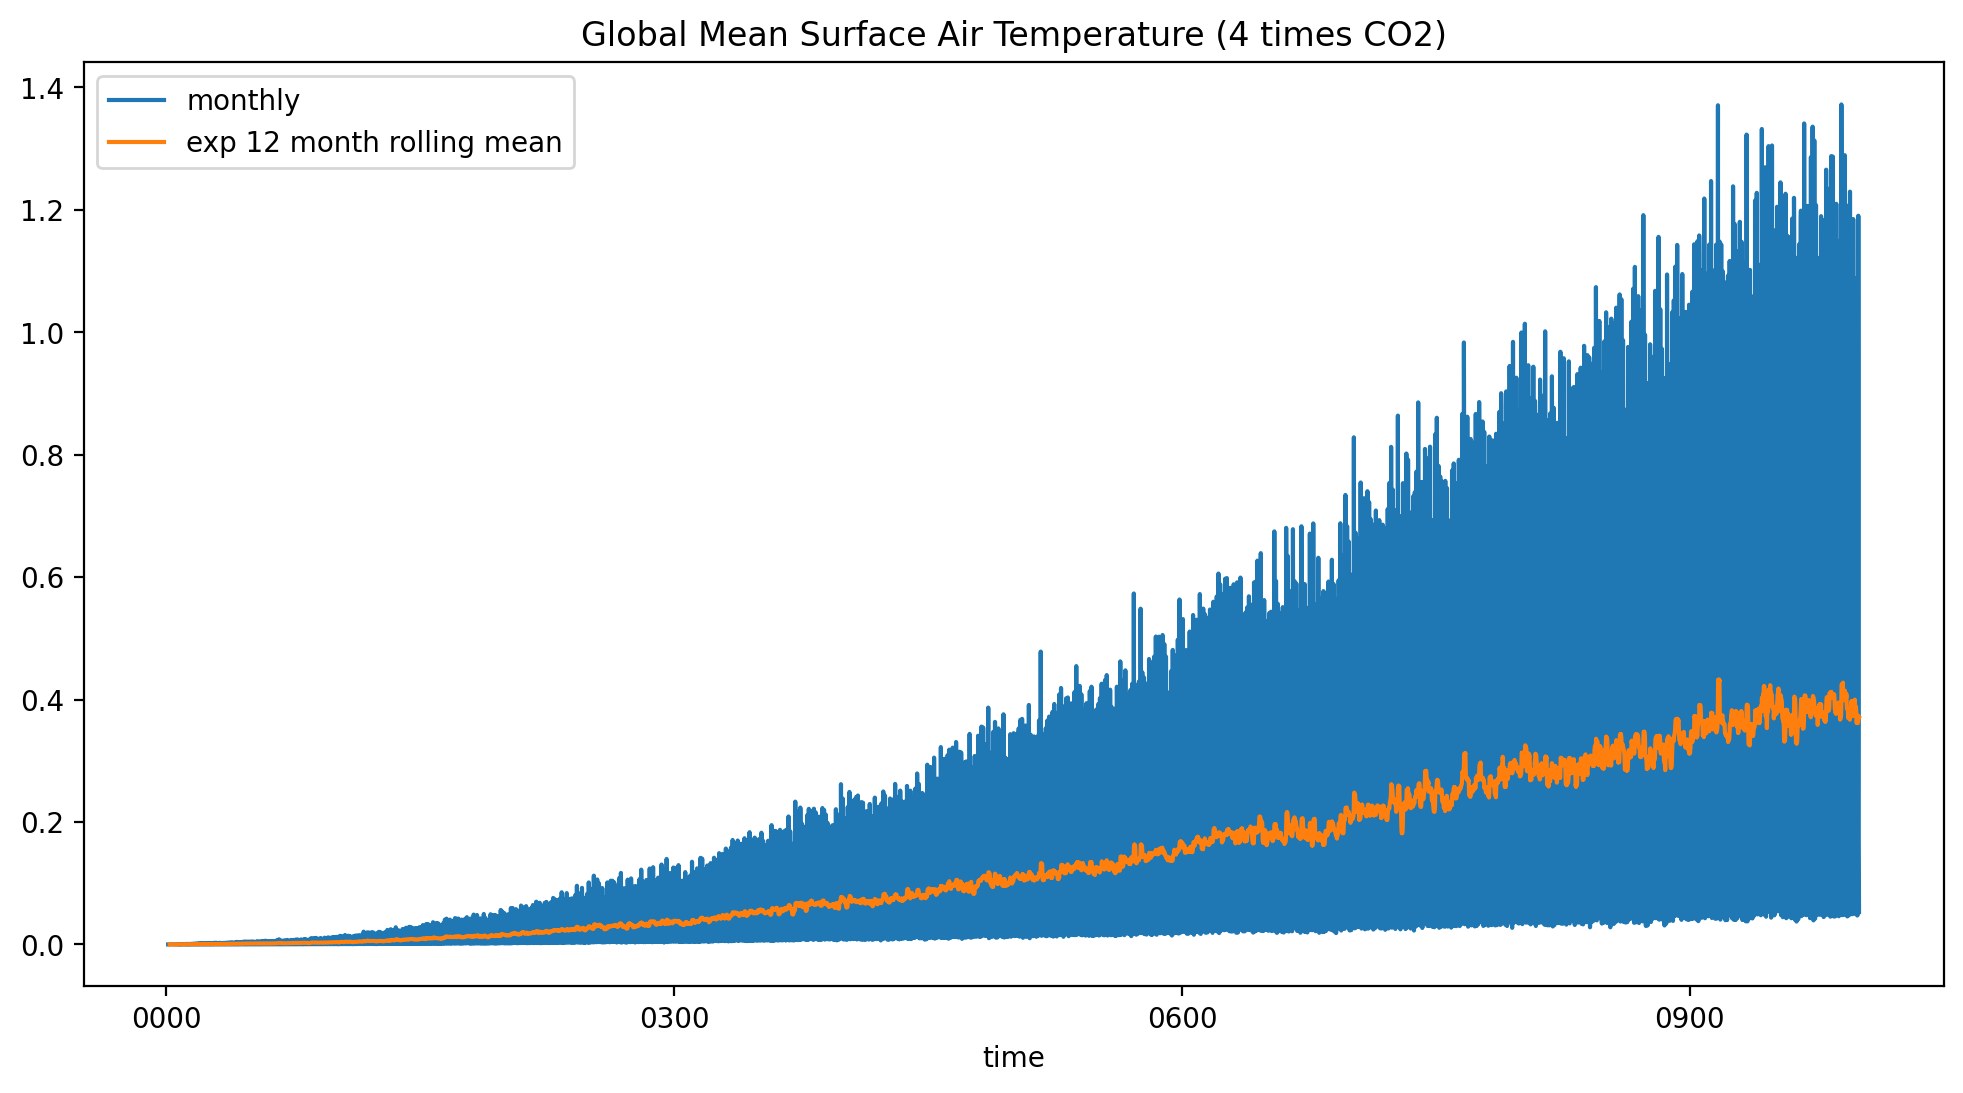

In [48]:
exp_ta_timeseries = np.exp(ta_timeseries-300)
exp_ta_timeseries.plot(label='monthly')
exp_ta_timeseries.rolling(time=12).mean().plot(label='exp 12 month rolling mean')
plt.legend()
plt.title('Global Mean Surface Air Temperature (4 times CO2)')